In [2]:
%matplotlib inline
import numpy as np
import sklearn as sk
import pandas as pd

In [3]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


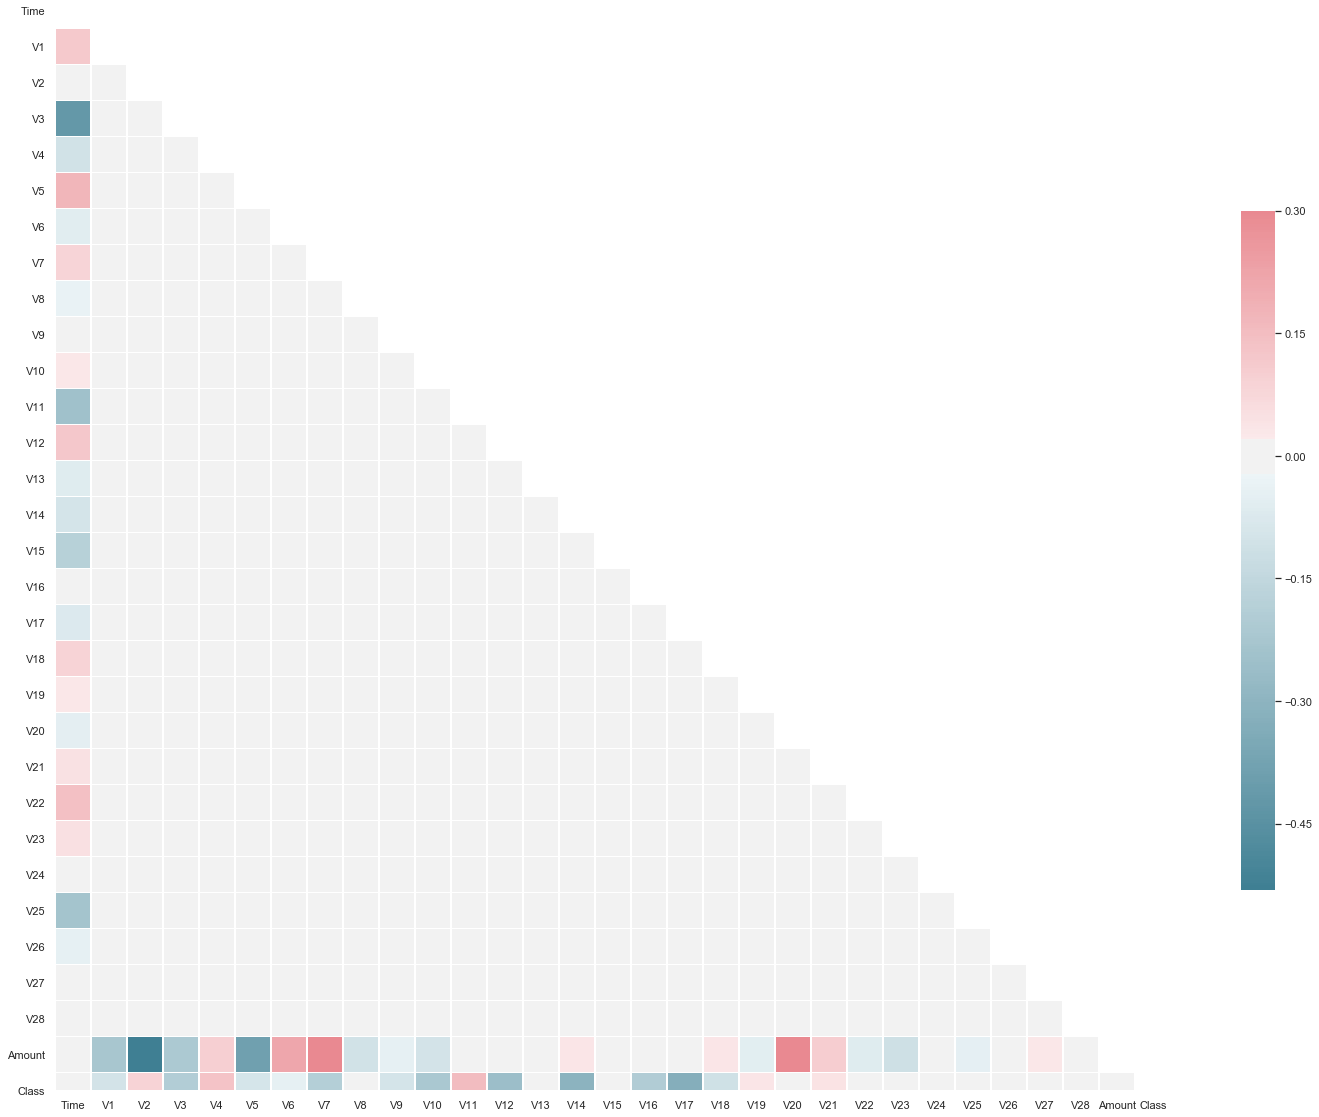

In [18]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

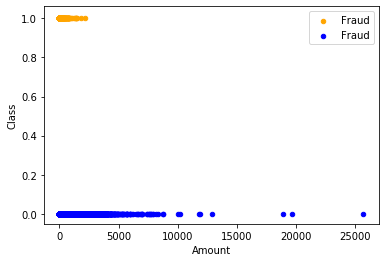

In [4]:
fraud = df.loc[df['Class']==1]
nonfraud = df.loc[df['Class']==0]
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
nonfraud.plot.scatter(x='Amount', y='Class', color='blue', label='Fraud', ax = ax)

In [5]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# split to input set and label
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# scale -> mean=0, s.e.=1
X_scaled = scale(X)
# project to 2 dimension
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_scaled) 

# split to train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, Y, test_size=0.8, random_state=500)


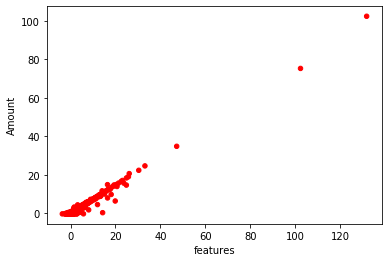

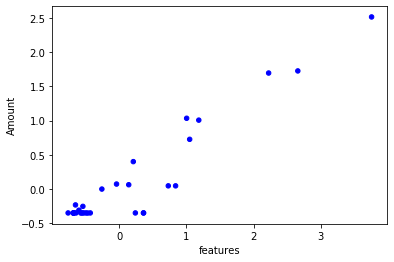

In [6]:
pcs = PCA(n_components=1)
X_asdf = pcs.fit_transform(X_scaled)
d_df=pd.DataFrame()

d_df['features']=[i[0] for i in X_asdf]
d_df['Amount']=scale(df['Amount'])

color={0:'r', 1:'b'}
d_df['Class'] =df['Class'].map(color)
d_df['Class2'] =df['Class']

d_df = d_df.sample(n=20000)

d_df.plot.scatter(x='features', y='Amount', c=d_df['Class'])
d_df.describe()

ndf = d_df[d_df['Class']=='b']

ndf.plot.scatter(x='features', y='Amount', c=ndf['Class'])


In [7]:
# perform kmeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

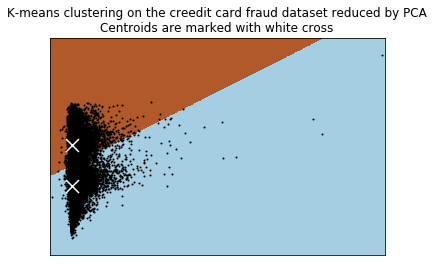

In [8]:
import matplotlib.pyplot as plt
# step size of the mesh. ↓ then ↑ quality of visualization
h = 0.01

# plot decision boundary
x_min, x_max = X_reduced[:,0].min()-1, X_reduced[:, 0].max()+1
y_min, y_max = X_reduced[:,1].min()-1, X_reduced[:, 1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )
# obtain labels for each point in mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z, interpolation = 'nearest',
    extent = (xx.min(), xx.max(), yy.min(), yy.max()),
    cmap = plt.cm.Paired,
    aspect = 'auto',
    origin = 'lower'
)

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)

# plot centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10
)
plt.title('K-means clustering on the creedit card fraud dataset reduced by PCA\n'
         'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [9]:
# predict test sets
predictions = kmeans.predict(X_test)

# calculate false-neg-rate and acc
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(Y_test==1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))

pred_good = np.where(predictions == 0) [0]
real_good = np.where(Y_test == 0) [0]
false_neg = len(np.setdiff1d(pred_good, real_good))

false_neg_rate = false_neg / (false_pos + false_neg)
accuracy = (len(X_test) - (false_neg+false_pos))/len(X_test)

print('{:-<20}: {:7f}'.format('false neg rate', false_neg_rate))
print('{:-<20}: {:7f}'.format('acc', accuracy))
print('{:-<20}: {}'.format('total data points', len(X_test)))
print('{:-<20}: {}'.format('misprediction', false_neg+false_pos))

false neg rate------: 0.002607
acc-----------------: 0.550464
total data points---: 227846
misprediction-------: 102425
